# Importing Dataset

In [1]:
# We will be using the legal_text_classification dataset for this program.
import pandas as pd
file = "C:/Users/seerl/Downloads/legal_text_classification.csv"
df = pd.read_csv(file)
df.head(20)

C:\Users\seerl\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\seerl\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


case_id case_outcome                                         case_title  \
0    Case1        cited  Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1    Case2        cited  Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...   
2    Case3        cited  Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
3    Case4        cited  Dais Studio Pty Ltd v Bullett Creative Pty Ltd...   
4    Case5        cited  Dr Martens Australia Pty Ltd v Figgins Holding...   
5    Case6        cited  GEC Marconi Systems Pty Ltd v BHP Information ...   
6    Case7        cited  John S Hayes &amp; Associates Pty Ltd v Kimber...   
7    Case8        cited  Seven Network Limited v News Limited (2007) 24...   
8    Case9      applied  Australian Broadcasting Corporation v O'Neill ...   
9   Case10     followed  Hexal Australia Pty Ltd v Roche Therapeutics I...   
10  Case11        cited  Castlemaine Tooheys Ltd v South Australia [198...   
11  Case12        cited  R v McFarlane; Ex parte O'Flannagan and O'Kell...   
12  Case13     followed  National Australia Bank v KDS Construction Ser...   
13  Case14     followed         George v Cluning (1979) 53 ALJR 767 (note)   
14  Case15     followed  Australian Mid-Eastern Club Limited v Yassim (...   
15  Case16     followed  Deputy Commissioner of Taxation v Visidet Pty ...   
16  Case17     followed  Deputy Commissioner of Taxation v Guy Holdings...   
17  Case19        cited  Motor Terms Co Pty Ltd v Liberty Insurance Ltd...   
18  Case21  referred to  Appellant S395/2002 v Minister for Immigration...   
19  Case22        cited  Minister for Immigration and Multicultural Aff...   

                                            case_text  
0   Ordinarily that discretion will be exercised s...  
1   The general principles governing the exercise ...  
2   Ordinarily that discretion will be exercised s...  
3   The general principles governing the exercise ...  
4   The preceding general principles inform the ex...  
5   I accept that the making of a rolled up offer ...  
6   The preceding general principles inform the ex...  
7   On the question of the level of unreasonablene...  
8   recent decision of the High Court in Australia...  
9   Hexal Australia Pty Ltd v Roche Therapeutics I...  
10  Hexal Australia Pty Ltd v Roche Therapeutics I...  
11  quia timet proceedings, the court will have re...  
12  It was not suggested in this proceeding that, ...  
13  Strictly speaking, a cheque, even a bank chequ...  
14  None of this is to suggest that the Deputy Com...  
15  None of this is to suggest that the Deputy Com...  
16  The true position is that the applicant's stat...  
17  Assuming that the Deputy Commissioner ought pr...  
18  am satisfied that the finding of the third Tri...  
19  is plain that, where an order is set aside, an...

# Printing the sentences in dataset

In [2]:
print(repr(df.iloc[2666]["case_text"][0:400]))
print(repr(df.iloc[4726]["case_text"][0:400]))

'I agree with the contention that the Trustee did fail properly to apply cl 27(g) of the Trust Deed. It is clear that it had a discretion as to whether to appoint Public Trustee or some other person to be trustee for the SST benefit: see cl 27(g)(ii). It does not appear to have exercised that discretion, because it has said in its letter of 25 October 2006 that it simply applied a rule or policy wi'
'SZMNP v Minister for Immigration and Citizenship [2009] FCA 596 at [38] , Jacobson J referred to there being " some tension in the authorities as to what use, if any, can be made of the Tribunal\'s written reasons in determining whether s 424A(1)(a) was enlivened ". His Honour accepted that in light of the decision in SZBYR " the question is to be determined in advance of, and independently from, t'


# Splitting the speech into sentences

In [3]:
# “paragraph” has the text cut up into multiple sentences and “number of paragraphs” has how many paragraphs

import re

# Before splitting into sentences, we should make sure that there are no null values in data
df['case_text'] = df['case_text'].fillna('Not Available')

df["paragraphs"] = df["case_text"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

# Getting the TFIDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['case_text'])
tfidf_text_vectors.shape

C:\Users\seerl\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(24985, 22883)

# Making a Dataframe of the sentences

In [5]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "case_text": paragraph, "case_outcome": year } 
                               for paragraphs, year in zip(df["paragraphs"], df["case_outcome"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

case_text case_outcome
0  Ordinarily that discretion will be exercised s...        cited
1  The general principles governing the exercise ...        cited
2  Ordinarily that discretion will be exercised s...        cited
3  The general principles governing the exercise ...        cited
4  The preceding general principles inform the ex...        cited
5  I accept that the making of a rolled up offer ...        cited
6  The preceding general principles inform the ex...        cited
7  On the question of the level of unreasonablene...        cited
8  recent decision of the High Court in Australia...      applied
9  Hexal Australia Pty Ltd v Roche Therapeutics I...     followed

# Getting TFIDF of the Dataframe

In [6]:
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["case_text"])
tfidf_para_vectors.shape

C:\Users\seerl\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(24985, 22883)

# Non-Negative Matrix Factorization (NMF) for text

In [7]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\seerl\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


# Creating and Displaying Topics

In [8]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]]*100.0/total)))
display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names()) 


Topic 00
  act (0.47)
  mr (0.37)
  evidence (0.35)
  trade (0.33)
  mark (0.33)

Topic 01
  tribunal (4.78)
  appellant (2.66)
  decision (1.33)
  information (0.87)
  review (0.85)

Topic 02
  minister (4.25)
  immigration (4.12)
  multicultural (3.78)
  affairs (3.75)
  indigenous (2.70)

Topic 03
  available (51.54)
  decision (0.32)
  member (0.24)
  information (0.23)
  prasad (0.21)

Topic 04
  court (2.41)
  appeal (1.52)
  federal (1.09)
  application (0.92)
  leave (0.83)

Topic 05
  ltd (2.56)
  pty (2.15)
  fca (0.87)
  australia (0.62)
  australian (0.56)

Topic 06
  privilege (2.69)
  documents (1.58)
  legal (1.55)
  advice (1.46)
  awb (1.45)

Topic 07
  costs (4.23)
  party (1.60)
  order (1.51)
  indemnity (0.91)
  security (0.75)

Topic 08
  clr (1.48)
  hca (1.42)
  commissioner (1.10)
  taxation (0.81)
  cj (0.50)

Topic 09
  respondent (1.72)
  austlii (1.60)
  au (1.59)
  date (1.54)
  policy (1.51)


C:\Users\seerl\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Non-Negative Matrix Factorization (NMF) for para

In [9]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names())

C:\Users\seerl\anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(



Topic 00
  act (0.47)
  mr (0.37)
  evidence (0.35)
  trade (0.33)
  mark (0.33)

Topic 01
  tribunal (4.78)
  appellant (2.66)
  decision (1.33)
  information (0.87)
  review (0.85)

Topic 02
  minister (4.25)
  immigration (4.12)
  multicultural (3.78)
  affairs (3.75)
  indigenous (2.70)

Topic 03
  available (51.54)
  decision (0.32)
  member (0.24)
  information (0.23)
  prasad (0.21)

Topic 04
  court (2.41)
  appeal (1.52)
  federal (1.09)
  application (0.92)
  leave (0.83)

Topic 05
  ltd (2.56)
  pty (2.15)
  fca (0.87)
  australia (0.62)
  australian (0.56)

Topic 06
  privilege (2.69)
  documents (1.58)
  legal (1.55)
  advice (1.46)
  awb (1.45)

Topic 07
  costs (4.23)
  party (1.60)
  order (1.51)
  indemnity (0.91)
  security (0.75)

Topic 08
  clr (1.48)
  hca (1.42)
  commissioner (1.10)
  taxation (0.81)
  cj (0.50)

Topic 09
  respondent (1.72)
  austlii (1.60)
  au (1.59)
  date (1.54)
  policy (1.51)


C:\Users\seerl\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
# In this step, we get to know which the biggest topic
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([12.4999747 , 12.0319866 ,  9.86928147,  3.02850696, 13.04144148,
       15.21485098,  5.26934395,  8.0492269 , 12.65276235,  8.34262461])

In [11]:
# In this step we get to knoe the biggest topic after TFIDF
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([12.4999747 , 12.0319866 ,  9.86928147,  3.02850696, 13.04144148,
       15.21485098,  5.26934395,  8.0492269 , 12.65276235,  8.34262461])

# Count Vectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["case_text"])
count_para_vectors.shape
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

C:\Users\seerl\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


# Shape of Documment-Term Matrix

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_para_vectorizer = CountVectorizer(stop_words=stopwords, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["case_text"])
count_para_vectors.shape

(24985, 22883)

# LDA

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [15]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


Topic 00
  ltd (5.14)
  pty (3.79)
  fca (1.99)
  australia (1.21)
  fcr (1.16)

Topic 01
  privilege (2.19)
  awb (2.17)
  legal (2.06)
  documents (1.89)
  advice (1.76)

Topic 02
  court (2.07)
  applicant (1.29)
  application (1.22)
  mr (0.95)
  order (0.94)

Topic 03
  act (0.94)
  evidence (0.88)
  title (0.70)
  person (0.68)
  law (0.60)

Topic 04
  ltd (1.53)
  contract (1.11)
  pty (1.02)
  court (0.97)
  act (0.91)

Topic 05
  tribunal (4.11)
  minister (2.54)
  decision (2.23)
  immigration (1.85)
  affairs (1.61)

Topic 06
  mr (1.22)
  conduct (0.68)
  agreement (0.52)
  applicant (0.49)
  case (0.47)

Topic 07
  commissioner (2.23)
  taxation (1.36)
  clr (1.19)
  hca (1.05)
  income (0.99)

Topic 08
  mark (1.51)
  trade (1.42)
  act (1.13)
  court (0.87)
  goods (0.80)

Topic 09
  court (2.10)
  clr (1.22)
  hca (1.15)
  act (1.14)
  power (0.80)


In [16]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([14.34402017,  2.33360067, 15.70863038,  7.61493151,  6.11669233,
       15.80562581,  8.80965494,  5.96065179,  4.30852916, 18.99766324])

# Visualsation using pyLDAvis

In [17]:
import pyLDAvis.lda_model

lda_display = pyLDAvis.lda_model.prepare(lda_para_model, count_para_vectors, count_para_vectorizer, sort_topics=False)
pyLDAvis.display(lda_display)

# Creating Wordcloud

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# NMF Wordcloud

C:\Users\seerl\anaconda\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\seerl\anaconda\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\seerl\anaconda\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\seerl\anaconda\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orien

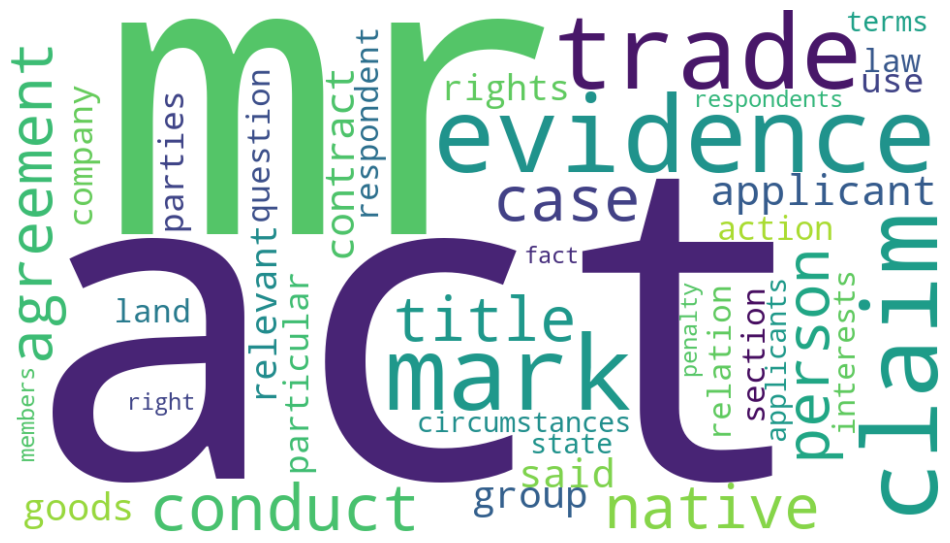

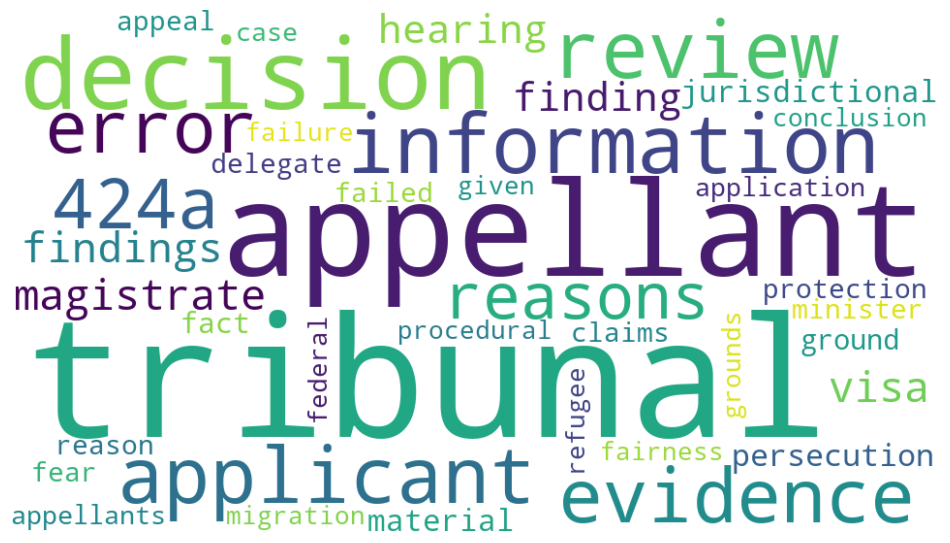

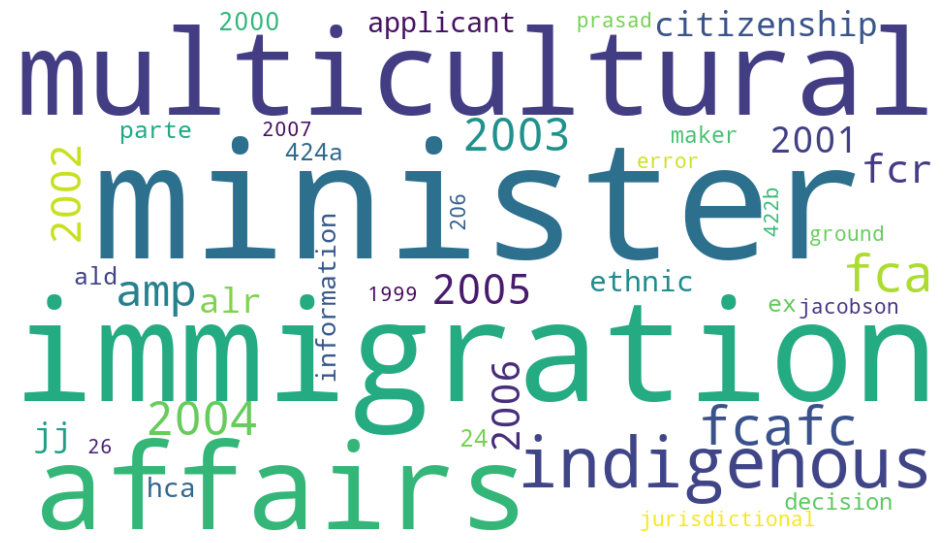

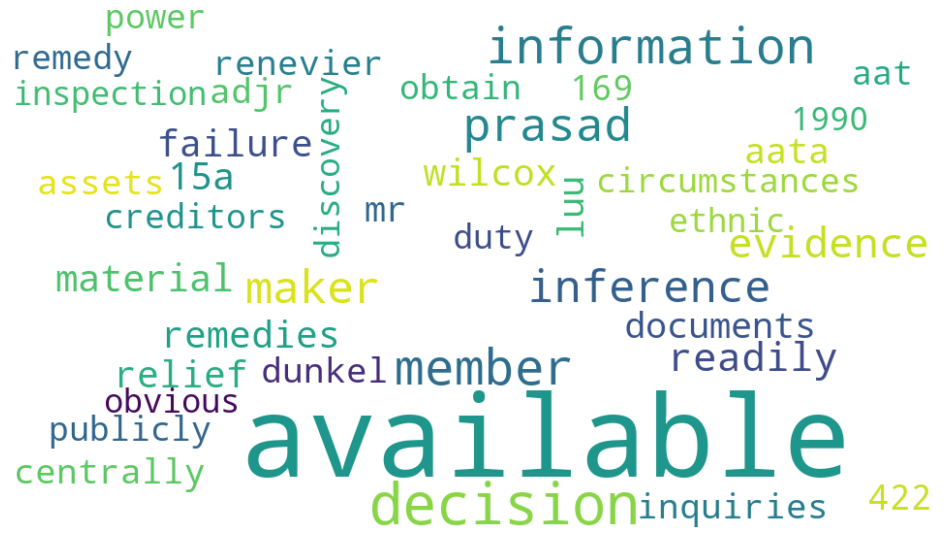

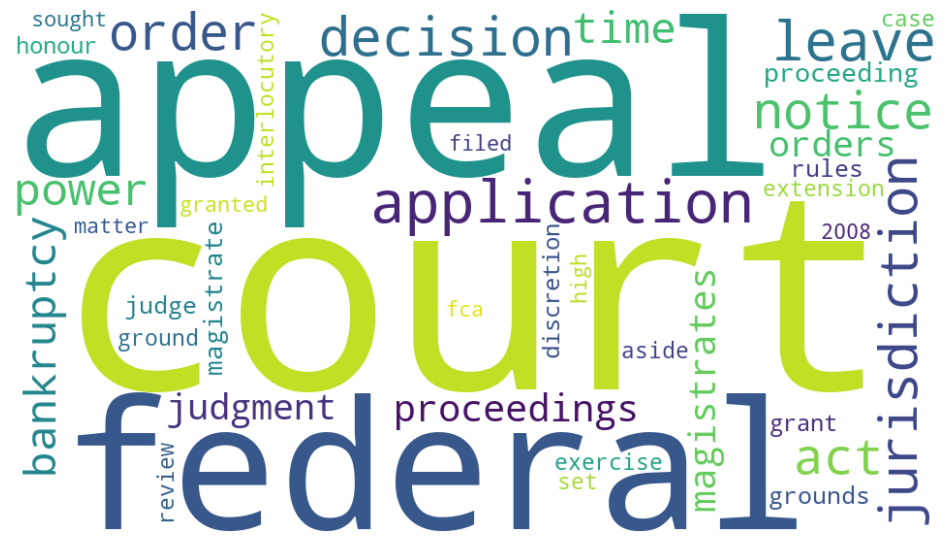

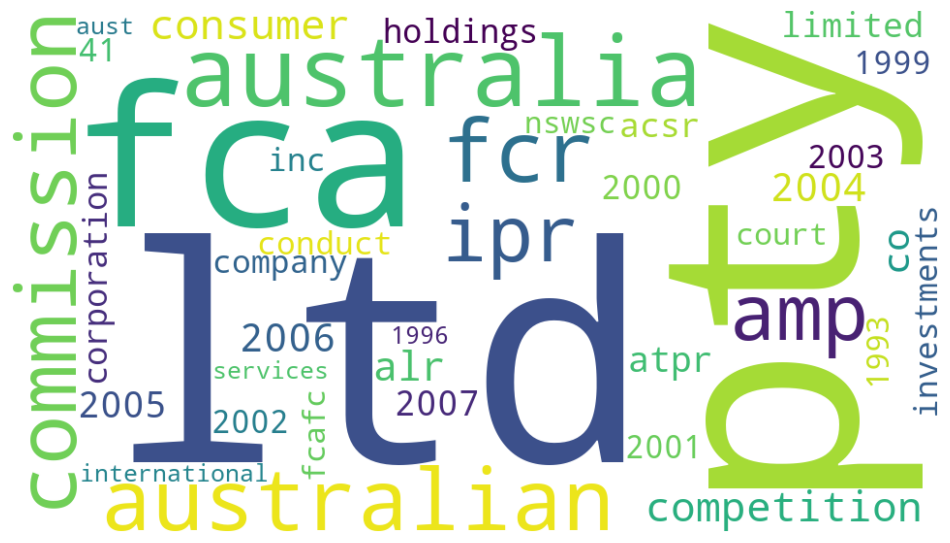

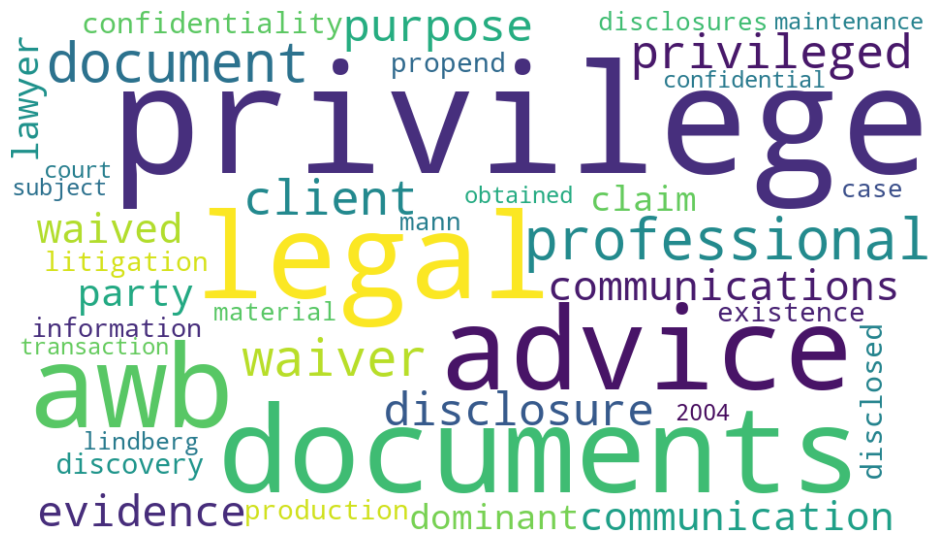

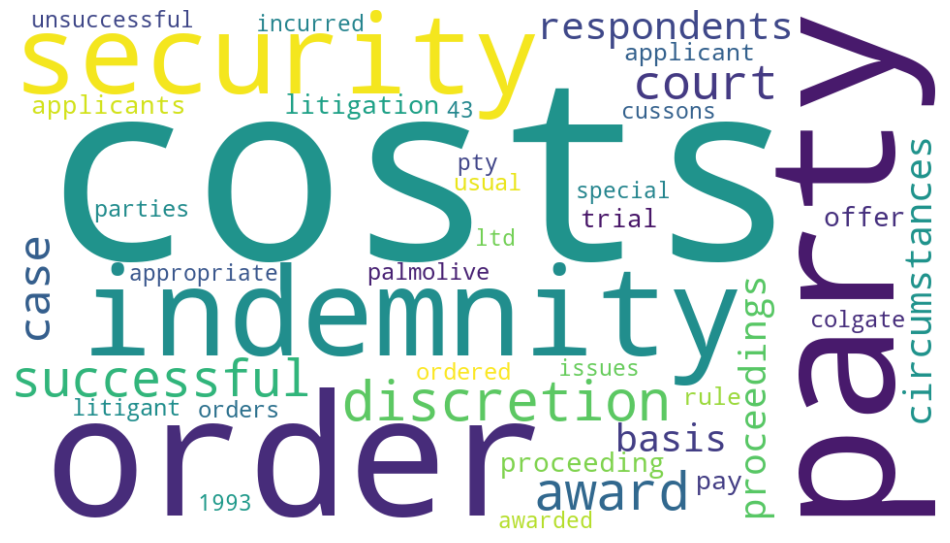

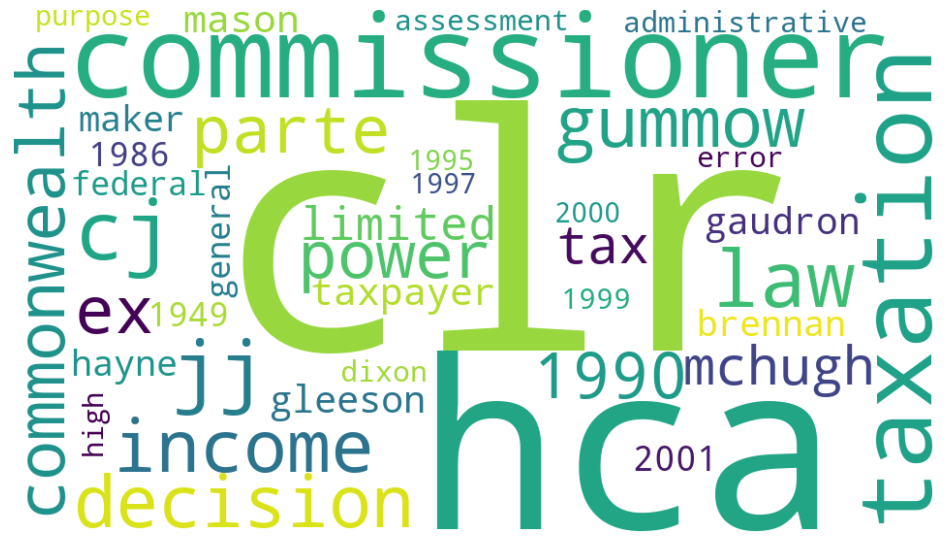

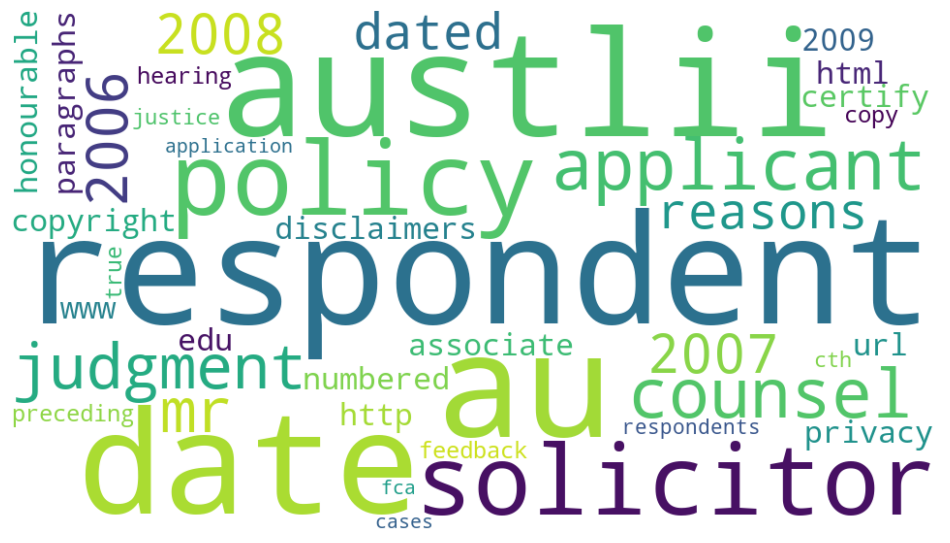

In [19]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

# LDA Wordcloud

C:\Users\seerl\anaconda\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\seerl\anaconda\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\seerl\anaconda\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\seerl\anaconda\lib\site-packages\wordcloud\wordcloud.py:522: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orien

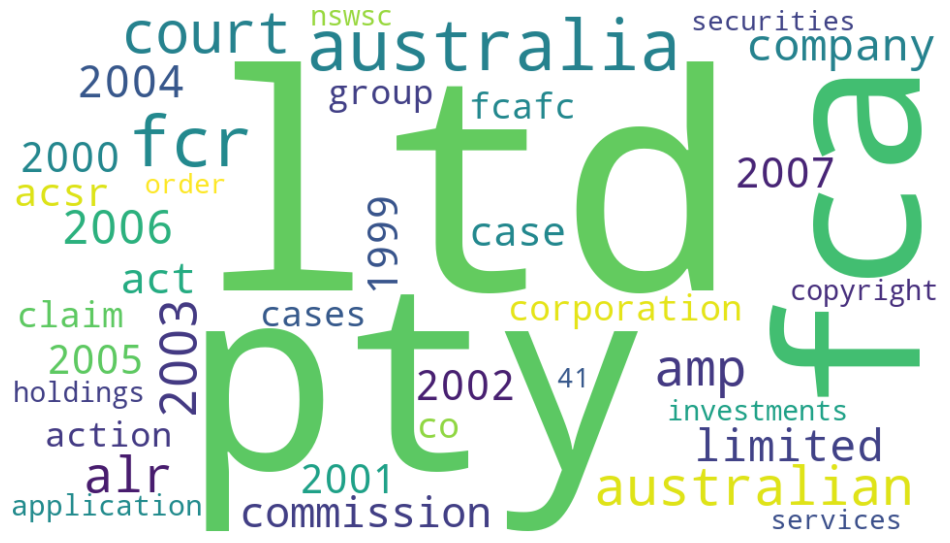

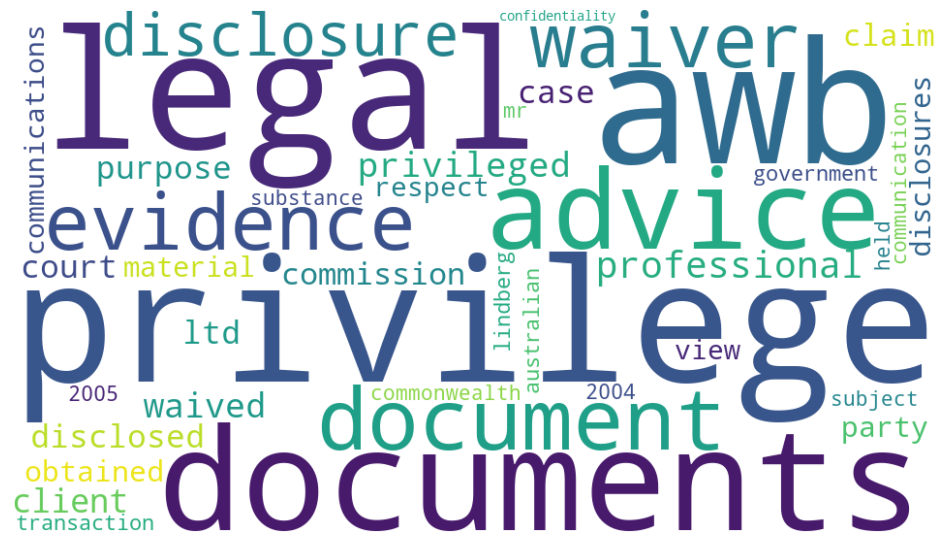

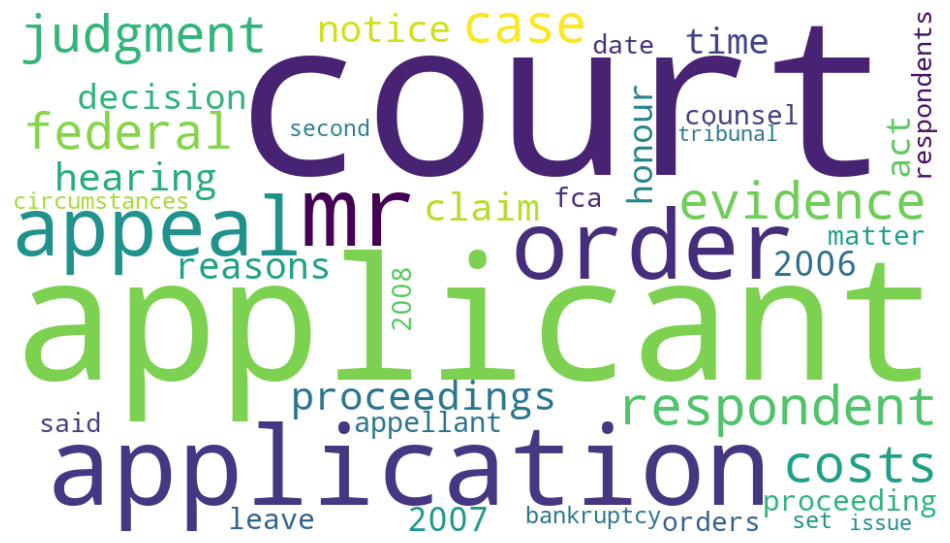

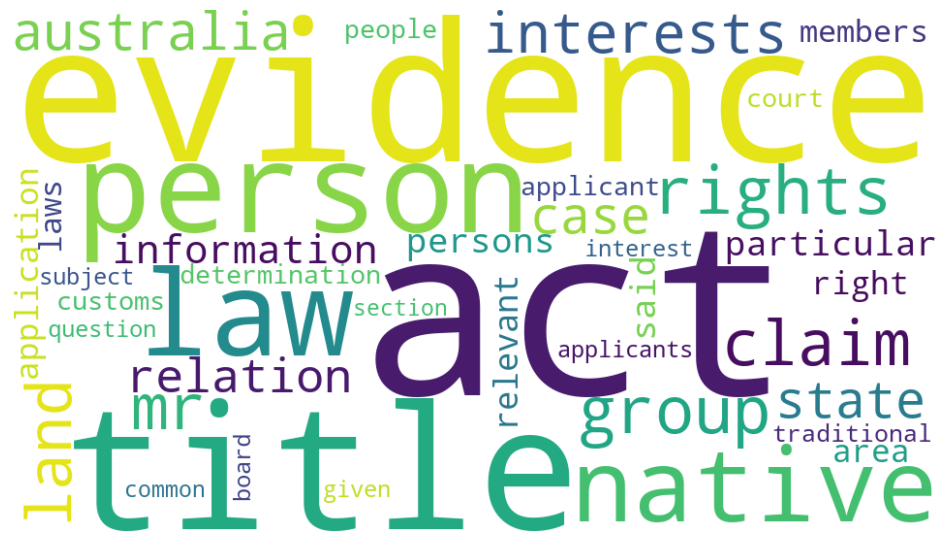

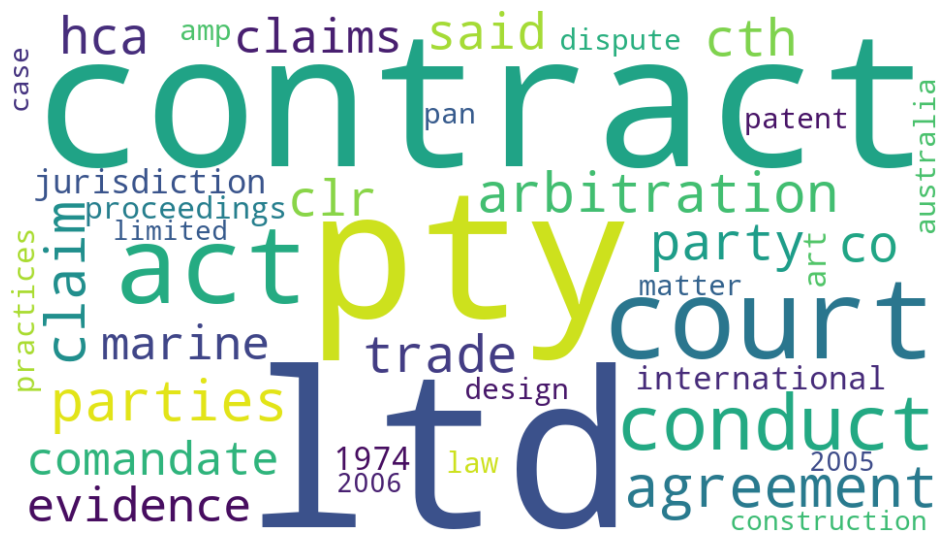

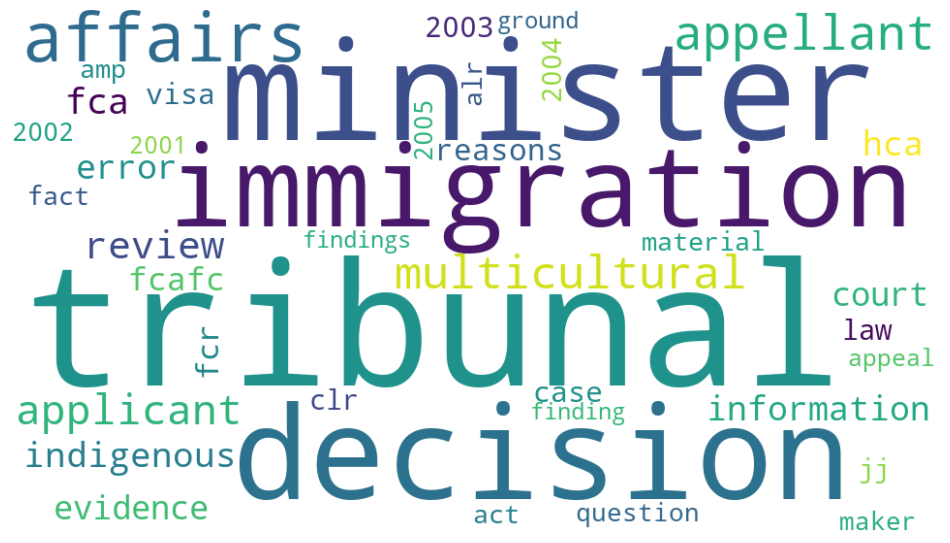

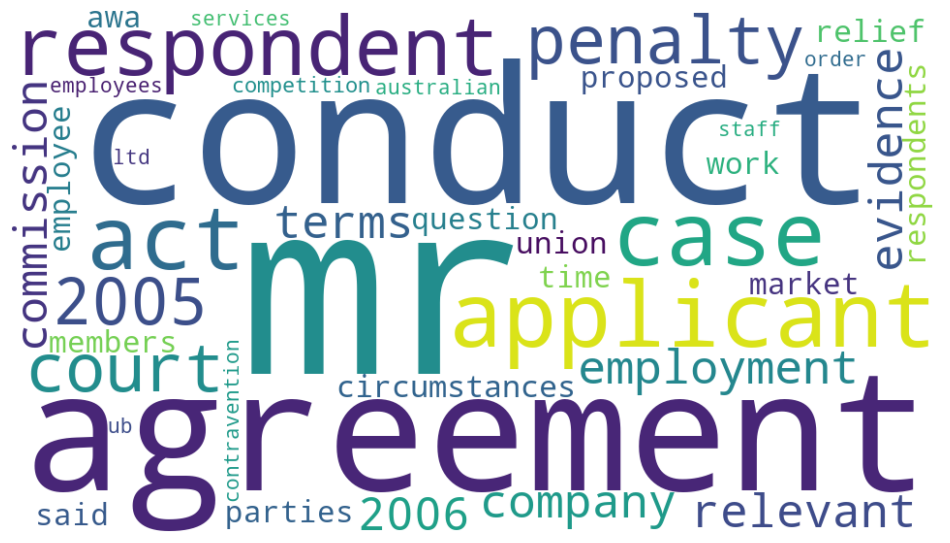

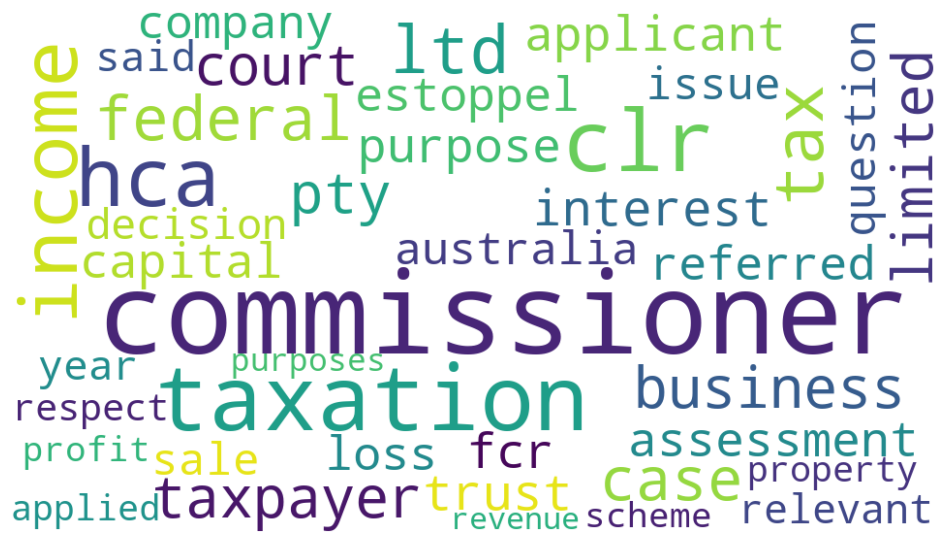

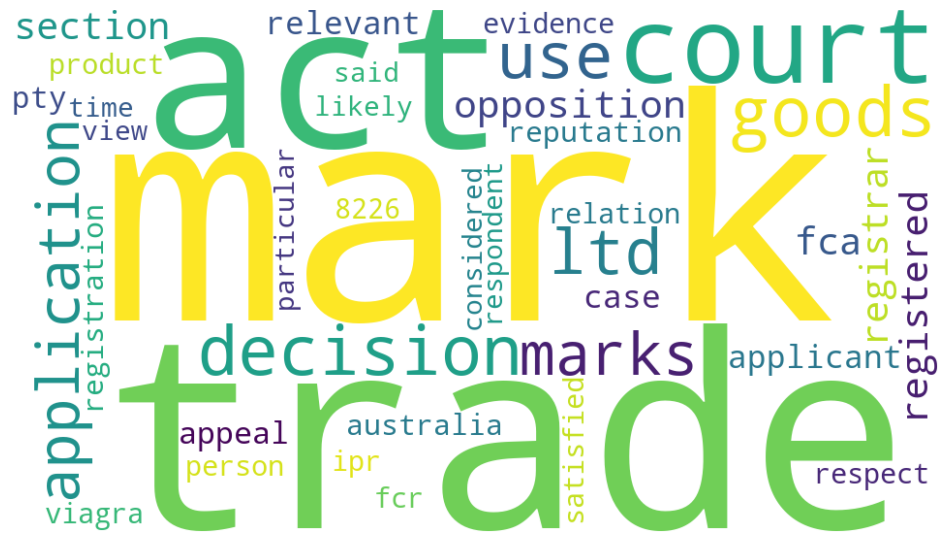

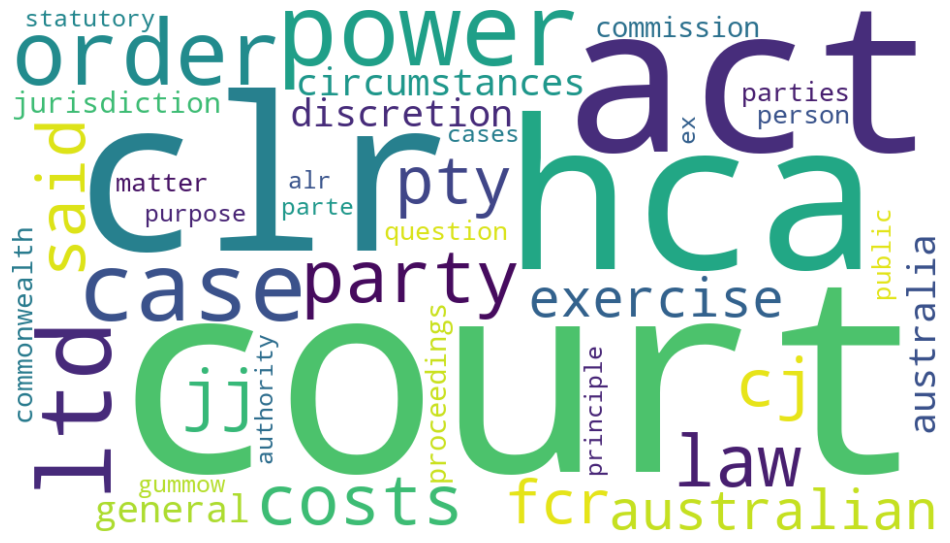

In [20]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

# Getting the Time Chart

In [21]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

C:\Users\seerl\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["case_outcome"]))):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["case_outcome"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='case_outcome'>

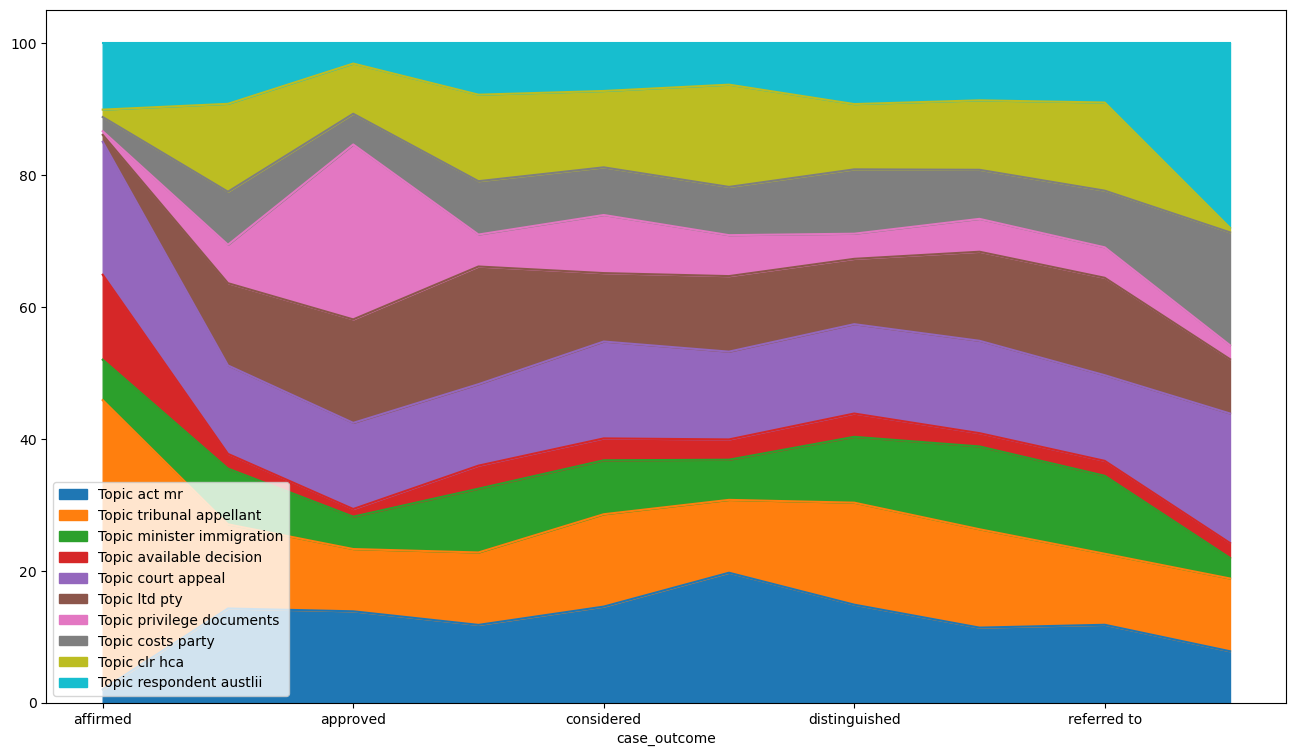

In [23]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["case_outcome"] + topic_names).set_index("case_outcome")
df_year.plot.area(figsize=(16,9))